In [5]:
import pandas as pd
data = pd.read_csv('final_data_add4.csv', index_col=0)
#df = df[['대여건수1', '거치대수1','sub_u','bus_u']]

In [6]:
top5_1 = data[data['구별'] == '광진구']
top5_2 = data[data['구별'] == '마포구']
top5_3 = data[data['구별'] == '영등포구']
top5_4 = data[data['구별'] == '송파구']
top5_5 = data[data['구별'] == '종로구']

top5 = pd.concat([top5_1,top5_2,top5_3,top5_4,top5_5])

top5

,사용년월,구별,거치대수,대여건수,getoff,geton,총승차수,총하차수,sub_u,bus_u,대여건수1,거치대수1,대여건수/거치대
0,2017-01,광진구,15.357143,163.857143,6.009987e+05,6.020923e+05,22504.83142,21600.25670,6.015455e+05,22052.54406,4588,430,298.753488
11,2017-02,광진구,15.357143,160.107143,6.035316e+05,6.038500e+05,22342.37786,21434.50382,6.036908e+05,21888.44084,4483,430,291.916279
22,2017-03,광진구,15.357143,425.035714,7.203349e+05,7.222599e+05,25535.72901,24435.53053,7.212974e+05,24985.62977,11901,430,774.948837
35,2017-04,광진구,15.357143,738.392857,7.091221e+05,7.112553e+05,24559.06870,23535.01527,7.101887e+05,24047.04198,20675,430,1346.279070
49,2017-05,광진구,15.357143,1041.964286,7.197384e+05,7.197070e+05,24515.24621,23564.71212,7.197227e+05,24039.97917,29175,430,1899.767442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2019-07,종로구,11.676923,1302.307692,9.858246e+05,9.674751e+05,16516.13881,16724.07082,9.766498e+05,16620.10482,84650,759,7249.341237
738,2019-08,종로구,11.651515,1181.196970,9.530547e+05,9.358031e+05,15943.61190,16195.18980,9.444289e+05,16069.40085,77959,769,6690.889468
763,2019-09,종로구,11.651515,1204.560606,8.994802e+05,8.842919e+05,15729.48442,15868.36544,8.918861e+05,15798.92493,79501,769,6823.232771
788,2019-10,종로구,11.651515,1456.075758,1.056398e+06,1.038216e+06,17239.83853,17367.53258,1.047307e+06,17303.68555,96101,769,8247.940183


In [7]:
# 데이터 정규화 
import pandas as pd
pd.options.mode.chained_assignment = None

def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x-series_mean)/series_std)
    return df

scale_columns = ['대여건수1', '거치대수1','sub_u','bus_u']

picher_df = standard_scaling(top5, scale_columns)
picher_df = picher_df.rename(columns = {'대여건수1' : 'y'})
picher_df

,사용년월,구별,거치대수,대여건수,getoff,geton,총승차수,총하차수,sub_u,bus_u,y,거치대수1,대여건수/거치대
0,2017-01,광진구,15.357143,163.857143,6.009987e+05,6.020923e+05,22504.83142,21600.25670,-0.672271,0.193033,-1.316487,-1.772011,298.753488
11,2017-02,광진구,15.357143,160.107143,6.035316e+05,6.038500e+05,22342.37786,21434.50382,-0.658184,0.178085,-1.318583,-1.772011,291.916279
22,2017-03,광진구,15.357143,425.035714,7.203349e+05,7.222599e+05,25535.72901,24435.53053,0.114071,0.460202,-1.170526,-1.772011,774.948837
35,2017-04,광진구,15.357143,738.392857,7.091221e+05,7.112553e+05,24559.06870,23535.01527,0.041127,0.374708,-0.995404,-1.772011,1346.279070
49,2017-05,광진구,15.357143,1041.964286,7.197384e+05,7.197070e+05,24515.24621,23564.71212,0.103731,0.374064,-0.825750,-1.772011,1899.767442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2019-07,종로구,11.676923,1302.307692,9.858246e+05,9.674751e+05,16516.13881,16724.07082,1.790825,-0.301798,0.281486,-0.484904,7249.341237
738,2019-08,종로구,11.651515,1181.196970,9.530547e+05,9.358031e+05,15943.61190,16195.18980,1.579248,-0.351960,0.147939,-0.445782,6690.889468
763,2019-09,종로구,11.651515,1204.560606,8.994802e+05,8.842919e+05,15729.48442,15868.36544,1.234229,-0.376597,0.178716,-0.445782,6823.232771
788,2019-10,종로구,11.651515,1456.075758,1.056398e+06,1.038216e+06,17239.83853,17367.53258,2.254787,-0.239532,0.510039,-0.445782,8247.940183


In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.formula.api import ols,glm

my_fomula = '대여건수1 ~ 거치대수1 + sub_u + bus_u'

lm = ols(my_fomula, data = top5).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  대여건수1   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     37.21
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           1.81e-18
Time:                        11:50:43   Log-Likelihood:                -198.37
No. Observations:                 171   AIC:                             404.7
Df Residuals:                     167   BIC:                             417.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-18      0.060  -8.71e-17      1.000      -0.118       0.118
거치대수1          0.5975      0.067      8.944      0.000       0.466       0.729
sub_u          0.1382      0.064      2.146      0.033       0.011       0.265
bus_u         -0.1745      0.062     -2.799      0.006      -0.298      -0.051
==============================================================================
Omnibus:                        1.177   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.162
Skew:                           0.085   Prob(JB):                        0.559
Kurtosis:                       2.634   Cond. No.                         1.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# tail5 상관관계 도출

tail5_1 = data[data['구별'] == '양천구']
tail5_2 = data[data['구별'] == '용산구']
tail5_3 = data[data['구별'] == '금천구']
tail5_4 = data[data['구별'] == '강북구']
tail5_5 = data[data['구별'] == '도봉구']

tail5 = pd.concat([tail5_1,tail5_2,tail5_3,tail5_4,tail5_5])
tail5

,사용년월,구별,거치대수,대여건수,getoff,geton,총승차수,총하차수,sub_u,bus_u,대여건수1,거치대수1,대여건수/거치대
5,2017-01,양천구,14.294118,71.823529,447740.0000,450798.7500,26325.749240,25455.740060,449269.3750,25890.744650,1221,243,85.419753
16,2017-02,양천구,14.294118,67.647059,441814.0000,445681.0000,26009.229360,25131.486240,443747.5000,25570.357800,1150,243,80.452675
27,2017-03,양천구,14.294118,168.941176,500818.0000,505141.7500,29431.929660,28480.321100,502979.8750,28956.125380,2872,243,200.921811
40,2017-04,양천구,14.294118,297.764706,475656.0000,482708.0000,27919.660550,27069.819570,479182.0000,27494.740060,5062,243,354.131687
59,2017-05,양천구,14.294118,439.882353,474965.5000,480559.0000,27875.073850,27000.255380,477762.2500,27437.664620,7478,243,523.152263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,2019-07,도봉구,12.000000,1132.848485,498126.0000,522328.5000,9912.943152,9284.948320,510227.2500,9598.945736,37384,396,3115.333333
725,2019-08,도봉구,12.000000,1067.818182,474925.0000,496618.5000,9591.457364,8995.762274,485771.7500,9293.609819,35238,396,2936.500000
750,2019-09,도봉구,12.000000,1079.090909,473677.3333,493447.1667,9255.669251,8694.806202,483562.2500,8975.237726,35610,396,2967.500000
775,2019-10,도봉구,12.000000,1247.575758,523279.5000,545498.1667,9977.651163,9371.979328,534388.8333,9674.815245,41170,396,3430.833333


In [10]:
# tall5 상관계수 구하기

cols = ['대여건수1', '거치대수1', 'sub_u', 'bus_u']
corr_tail = tail5[cols].corr(method = 'pearson')
corr_tail

,대여건수1,거치대수1,sub_u,bus_u
대여건수1,1.000000,0.688080,-0.162295,-0.413990
거치대수1,0.688080,1.000000,-0.022726,-0.602388
sub_u,-0.162295,-0.022726,1.000000,0.181175
bus_u,-0.413990,-0.602388,0.181175,1.000000


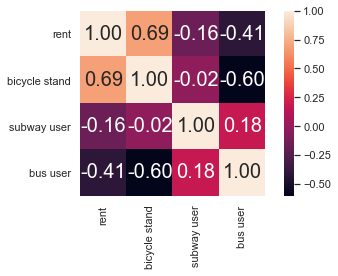

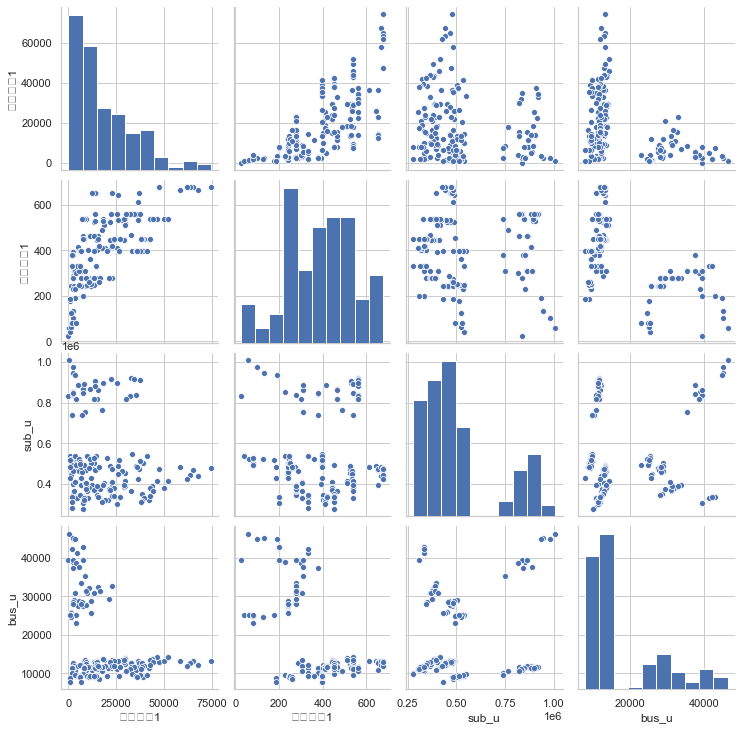

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

cols_view = ['rent', 'bicycle stand', 'subway user', 'bus user']
sns.set(font_scale=1)

hm = sns.heatmap(corr_tail.values, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':20}, yticklabels = cols_view, xticklabels = cols_view)

plt.tight_layout()
plt.show()

#피처간의 산점도
sns.set(style='whitegrid' , context='notebook')
sns.pairplot(tail5[['대여건수1', '거치대수1', 'sub_u', 'bus_u']], height= 2.5)
plt.show()


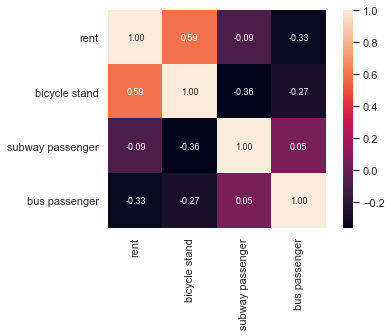

<Figure size 720x720 with 0 Axes>

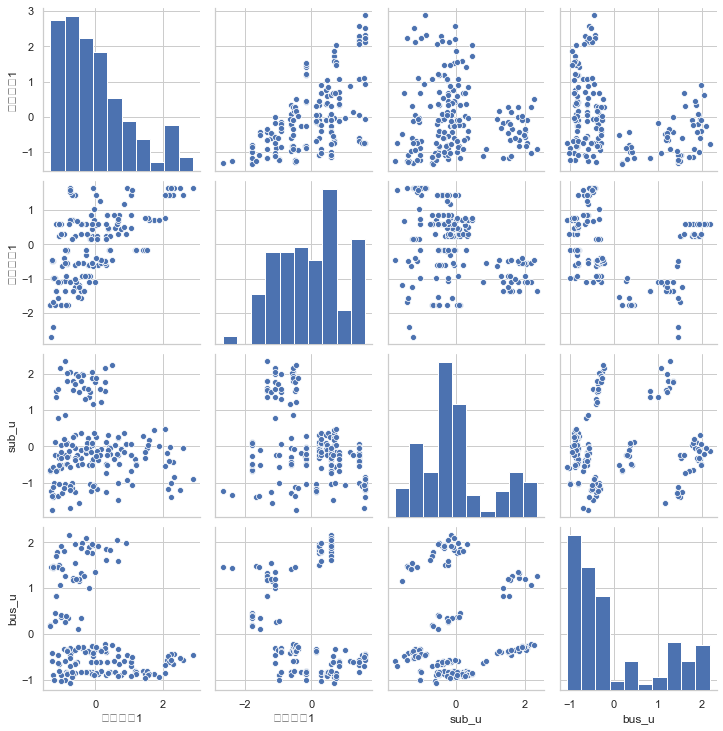

<Figure size 1008x1008 with 0 Axes>

In [13]:
#top5 추출
data_top5 = top5[['사용년월', '구별', '대여건수1', '거치대수1', 'sub_u', 'bus_u']]


#상관관계 구하기 
cols = [ '대여건수1', '거치대수1', 'sub_u', 'bus_u']
corr = data_top5[cols].corr(method = 'pearson')
corr

# 상관계수 행렬의 히트맵 시각화
cols_view = ['rent','bicycle stand','subway passenger','bus passenger']
sns.set(font_scale=1)
heat_map = sns.heatmap(corr.values, cbar = True, annot=True, square=True, fmt ='.2f', annot_kws={'size':9}, yticklabels = cols_view, xticklabels = cols_view)
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()

# 피쳐간의 산점도 그래프 
sns.set(style='whitegrid', context='notebook')
sns.pairplot(data_top5[['대여건수1', '거치대수1', 'sub_u', 'bus_u']], height=2.5)
plt.figure(figsize=(14,14))
plt.show()